## Import Libraries

In [1]:
# !pip install tensorflow
# !pip install tabulate
#!pip list
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.mixture import GaussianMixture

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats as st #has probplot() func
from scipy.stats import norm, beta
import statsmodels.api as sm # has ProbPlot with ppplot (percentiles), qqplot(quantiles),probplot(unscaled quantiles of x vs prob norm)
from statsmodels.gam.api import GLMGam, BSplines

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import LinearRegression,Lasso,LassoLarsIC
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,BaggingRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn import svm
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import jaccard_score, f1_score, log_loss
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.metrics import RocCurveDisplay
import sklearn.metrics as metrics
import sklearn.tree as tree

from xgboost import XGBClassifier, XGBRegressor
import xgboost

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import PredictionErrorDisplay
from sklearn.inspection import permutation_importance
from tabulate import tabulate
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV, RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import SplineTransformer
from pygam import LinearGAM, s, f, l, te
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer
from sklearn.neural_network import MLPRegressor
from numpy import random
from itertools import combinations, combinations_with_replacement
from sklearn.tree import export_graphviz, plot_tree  
import shap
shap.initjs()
from sklearn.utils.class_weight import compute_sample_weight
#from snapml import DecisionTreeRegressor as SnapDecisionTreeRegressor
#from snapml import RandomForestRegressor as SnapRandomForestRegressor
#from snapml import BoostingMachineRegressor as SnapBoostingMachineRegressor
import neuralsens.partial_derivatives as ns
import pickle
from kneed import KneeLocator
from sklearnex import patch_sklearn
from sklearn.preprocessing import KBinsDiscretizer


## Preprocessing 

(21907, 186)
<class 'pandas.core.indexes.base.Index'>
175
[0 1]


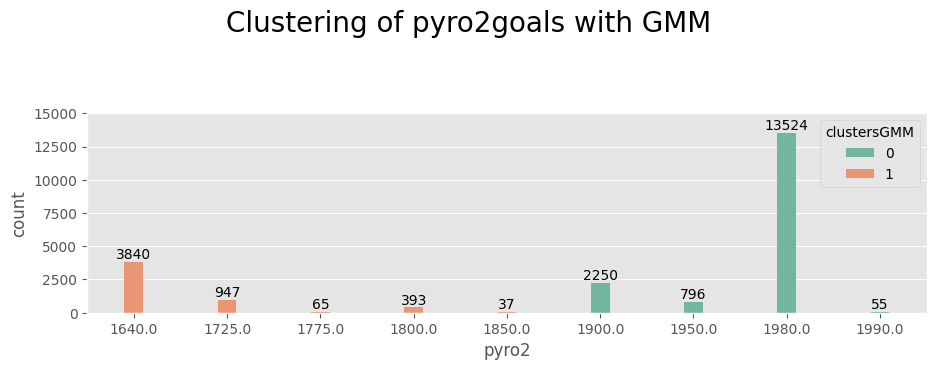

C:\Users\carlo\AppData\Local\Temp\ipykernel_14828\2516869773.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a=pd.DataFrame(modelGMM.means_,columns=["center"]).assign(label = lambda x: x.iloc[:,0].map(lambda y: "HighGoal" if y==x.max()[0] else "LowGoal")).reset_index(names="cluster")


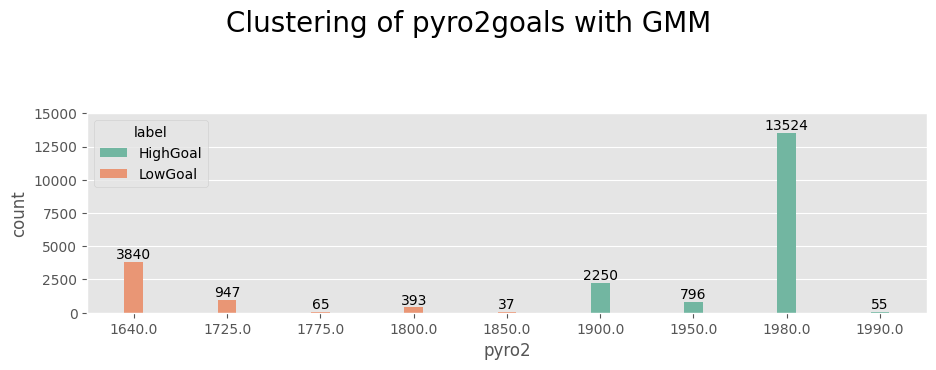

CPU times: total: 7.27 s
Wall time: 7.37 s


In [4]:
%%time
#:9min
# %run /doc/NB_dir/js5296/AP1/sql.ipynb 
#%run EDA1V.ipynb
%matplotlib inline
#%run /workspace/files/js5296/ECP2_AP1/modeling/Preprocessing.ipynb
import os
#os.chdir(r"C:\Users\js5296\PycharmProjects\ECP2_AP1\modeling")
%run EDA1V_new.ipynb #preprocessing NB
#os.chdir(r"C:\Users\js5296\PycharmProjects\ECP2_AP1\modeling\ZoneTempSP_statistical")
#NASDOMAIN\username
;

In [5]:
print(dfXY.shape)
dfXY.columns.tolist()

(21907, 186)


['AP1_FurnaceThickness',
 'AP1_FurnaceWidth',
 'AP1_FurnaceCombustionAirPressureCV',
 'AP1_FurnaceCombustionAirPressureFeedback',
 'AP1_FurnaceCombustionAirPressureSetPoint',
 'AP1_FurnaceCombustionAirTempFurnace',
 'AP1_FurnaceDilutionAirTemperatureCV',
 'AP1_FurnaceDilutionAirTemperatureFeedback',
 'AP1_FurnaceDilutionAirTemperatureSetPoint',
 'AP1_FurnaceLineSpeed',
 'AP1_FurnaceNonContactWaterPressure',
 'AP1_FurnacePressureCV',
 'AP1_FurnacePressureFeedback',
 'AP1_FurnacePressureSetPoint',
 'AP1_FurnacePyro1Temp',
 'AP1_FurnacePyro2Temp',
 'AP1_FurnaceRWPEntryTemp',
 'AP1_FurnaceRWPExitTemp',
 'AP1_FurnaceRecuperatorInletTemp',
 'AP1_FurnaceRecuperatorOutletTemp',
 'AP1_FurnaceTV',
 'AP1_FurnaceTonsPerHour',
 'AP1_FurnaceTotalMeasuredGasFlow',
 'AP1_FurnaceTotalSummedAirFlow',
 'AP1_FurnaceWeldInFurnace',
 'AP1_FurnaceZone0BottomAir/GasRatioPV',
 'AP1_FurnaceZone0BottomAir/GasRatioSP',
 'AP1_FurnaceZone0BottomAirFlowControlValveCV',
 'AP1_FurnaceZone0BottomAirFlowFdbk',
 'AP1_Fur

## Feature Selection

### Load Dataset

In [6]:
####CHECK STORED MODEL#####
# Deserialization
with open("dfXYPreprocessed.pickle", "rb") as infile:
    dfXYPreprocessed = pickle.load(infile)
#print("Reconstructed object", dfXY)
dfXYPreprocessed.columns.tolist()

['AP1_FurnaceThickness',
 'AP1_FurnaceWidth',
 'AP1_FurnaceCombustionAirPressureCV',
 'AP1_FurnaceCombustionAirPressureFeedback',
 'AP1_FurnaceCombustionAirPressureSetPoint',
 'AP1_FurnaceCombustionAirTempFurnace',
 'AP1_FurnaceDilutionAirTemperatureCV',
 'AP1_FurnaceDilutionAirTemperatureFeedback',
 'AP1_FurnaceDilutionAirTemperatureSetPoint',
 'AP1_FurnaceLineSpeed',
 'AP1_FurnaceNonContactWaterPressure',
 'AP1_FurnacePressureCV',
 'AP1_FurnacePressureFeedback',
 'AP1_FurnacePressureSetPoint',
 'AP1_FurnacePyro1Temp',
 'AP1_FurnacePyro2Temp',
 'AP1_FurnaceRecuperatorInletTemp',
 'AP1_FurnaceRecuperatorOutletTemp',
 'AP1_FurnaceTV',
 'AP1_FurnaceTonsPerHour',
 'AP1_FurnaceTotalMeasuredGasFlow',
 'AP1_FurnaceTotalSummedAirFlow',
 'AP1_FurnaceWeldInFurnace',
 'AP1_FurnaceZone0BottomAir/GasRatioPV',
 'AP1_FurnaceZone0BottomAir/GasRatioSP',
 'AP1_FurnaceZone0BottomAirFlowControlValveCV',
 'AP1_FurnaceZone0BottomAirFlowFdbk',
 'AP1_FurnaceZone0BottomAirFlowSetpoint',
 'AP1_FurnaceZone0Bott

In [7]:
dfXY=dfXYPreprocessed.copy()

In [8]:
###Create Numeric Vars###
numerical_var_series = dfXY[dfXY.columns[dfXY.dtypes == np.float64]].columns
# Create the different groups of columns to plot
proceso_vars_series = dfXY[numerical_var_series[(~numerical_var_series.str.contains("AP1_Furnace", regex=False)) & (~numerical_var_series.str.contains("pyro2", regex=False))]].columns  # .head(1)
zoneTemp_vars_series = dfXY[numerical_var_series[numerical_var_series.str.contains(".*Zone.*Temp.*", regex=True)]].columns  # .head(1)
zoneAirGas_vars_series = dfXY[numerical_var_series[numerical_var_series.str.contains(".*Zone.*Air.*|.*Zone.*Gas.*", regex=True)]].columns  # .head(1)
recuperator_vars_series = dfXY[numerical_var_series[numerical_var_series.str.contains("AP1_Furnace.*Dilution|Recuperator|RWP|Combustion.*",regex=True)]].columns  # .head(1)
pyro_vars_series = dfXY[numerical_var_series[numerical_var_series.str.contains(".*pyro.*|.*Pyro.*", regex=True)]].columns  # .head(1)
rest_vars_series = dfXY[[var for var in numerical_var_series.to_list() if var not in proceso_vars_series.to_list() and var not in zoneTemp_vars_series.to_list() and var not in zoneAirGas_vars_series.to_list() and var not in recuperator_vars_series.to_list() and var not in pyro_vars_series.to_list()]].columns  # .head(1)


### Create SP DataFrame

In [9]:
dfSP = dfXY[zoneTemp_vars_series[~zoneTemp_vars_series.str.contains(".*CV.*",regex=True)].tolist()+["AP1_FurnaceTV","CurrentGuage","AP1_FurnaceLineSpeed","CurrentWidth"]+pyro_vars_series[1:].tolist()+["WidthFamCluster","SteelFamCluster"]]
print(dfSP.shape)
dfSP.head(3)

(21907, 27)


,AP1_FurnaceZone0MasterTempFdbk,AP1_FurnaceZone0MasterTempOperatorSetpoint,AP1_FurnaceZone0MasterTempSetpoint,AP1_FurnaceZone1TemperatureSetpoint,AP1_FurnaceZone1TopTemp,AP1_FurnaceZone2TemperatureSetpoint,AP1_FurnaceZone2TopTemp,AP1_FurnaceZone3TemperatureSetpoint,AP1_FurnaceZone3TopTemp,AP1_FurnaceZone4TemperatureSetpoint,...,AP1_FurnaceZone8TemperatureSetpoint,AP1_FurnaceZone8TopTemp,AP1_FurnaceTV,CurrentGuage,AP1_FurnaceLineSpeed,CurrentWidth,AP1_FurnacePyro2Temp,pyro2,WidthFamCluster,SteelFamCluster
ts,,,,,,,,,,,,,,,,,,,,,
2024-05-09 08:40:00,1553.237427,1626.891968,1626.891968,2050.0,2024.353027,2050.0,1927.593140,2050.0,1969.559082,2000.0,...,2000.0,2013.073486,38.700146,0.04,124.969482,61.4117,1943.0,1980.0,1.0,0.0
2024-05-09 08:42:00,1659.927856,1793.174438,1793.174438,2050.0,2058.332031,2050.0,1938.329590,2050.0,2006.133911,2050.0,...,2050.0,2042.722168,38.700146,0.04,124.969482,61.4117,1958.0,1980.0,1.0,0.0
2024-05-09 08:44:00,1794.752930,1960.915527,1960.915527,2050.0,2075.686523,2050.0,1962.483887,2050.0,2010.333496,2050.0,...,2050.0,2061.698975,38.719051,0.04,125.030533,61.4117,1983.0,1980.0,1.0,0.0


In [10]:
dfSP.columns.tolist()

['AP1_FurnaceZone0MasterTempFdbk',
 'AP1_FurnaceZone0MasterTempOperatorSetpoint',
 'AP1_FurnaceZone0MasterTempSetpoint',
 'AP1_FurnaceZone1TemperatureSetpoint',
 'AP1_FurnaceZone1TopTemp',
 'AP1_FurnaceZone2TemperatureSetpoint',
 'AP1_FurnaceZone2TopTemp',
 'AP1_FurnaceZone3TemperatureSetpoint',
 'AP1_FurnaceZone3TopTemp',
 'AP1_FurnaceZone4TemperatureSetpoint',
 'AP1_FurnaceZone4TopTemp',
 'AP1_FurnaceZone5TemperatureSetpoint',
 'AP1_FurnaceZone5TopTemp',
 'AP1_FurnaceZone6TemperatureSetpoint',
 'AP1_FurnaceZone6TopTemp',
 'AP1_FurnaceZone7TemperatureSetpoint',
 'AP1_FurnaceZone7TopTemp',
 'AP1_FurnaceZone8TemperatureSetpoint',
 'AP1_FurnaceZone8TopTemp',
 'AP1_FurnaceTV',
 'CurrentGuage',
 'AP1_FurnaceLineSpeed',
 'CurrentWidth',
 'AP1_FurnacePyro2Temp',
 'pyro2',
 'WidthFamCluster',
 'SteelFamCluster']

In [11]:
#CHECK NAN VALUES
print(dfSP.shape)
dfSP.isna().sum(axis=0)

(21907, 27)


AP1_FurnaceZone0MasterTempFdbk                8828
AP1_FurnaceZone0MasterTempOperatorSetpoint    6373
AP1_FurnaceZone0MasterTempSetpoint            6373
AP1_FurnaceZone1TemperatureSetpoint           1222
AP1_FurnaceZone1TopTemp                       1373
AP1_FurnaceZone2TemperatureSetpoint           1222
AP1_FurnaceZone2TopTemp                       1397
AP1_FurnaceZone3TemperatureSetpoint           1460
AP1_FurnaceZone3TopTemp                       1355
AP1_FurnaceZone4TemperatureSetpoint           1222
AP1_FurnaceZone4TopTemp                       1370
AP1_FurnaceZone5TemperatureSetpoint           1435
AP1_FurnaceZone5TopTemp                       1314
AP1_FurnaceZone6TemperatureSetpoint           1222
AP1_FurnaceZone6TopTemp                       1381
AP1_FurnaceZone7TemperatureSetpoint           1407
AP1_FurnaceZone7TopTemp                       1305
AP1_FurnaceZone8TemperatureSetpoint           1420
AP1_FurnaceZone8TopTemp                       1305
AP1_FurnaceTV                  

In [12]:
#Check duplicated index
len(dfSP.index[dfSP.index.duplicated()])

0

In [13]:
dfSP.loc[:,"SteelFamLabel"]=dfSP.loc[:,"SteelFamCluster"].copy().map(lambda x: "HighGoal" if x==0.0 else "LowGoal" if x==1.0 else np.nan)
dfSP.loc[:,"WidthFamLabel"]=dfSP.loc[:,"WidthFamCluster"].copy().map(lambda x: "SmallWidth" if x==0.0 else "BigWidth" if x==1.0 else np.nan)

C:\Users\carlo\AppData\Local\Temp\ipykernel_14828\2862553545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSP.loc[:,"SteelFamLabel"]=dfSP.loc[:,"SteelFamCluster"].copy().map(lambda x: "HighGoal" if x==0.0 else "LowGoal" if x==1.0 else np.nan)
C:\Users\carlo\AppData\Local\Temp\ipykernel_14828\2862553545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSP.loc[:,"WidthFamLabel"]=dfSP.loc[:,"WidthFamCluster"].copy().map(lambda x: "SmallWidth" if x==0.0 else "BigWidth" if x==1.0 else np.nan)


In [14]:
dfSP.head()
dfSP.SteelFamCluster.unique()

array([ 0., nan,  1.])

## Pyro2 mean and std

In [15]:
dfSP.drop("WidthFamLabel",axis=1,inplace=False).groupby(["SteelFamCluster","SteelFamLabel"]).mean().pyro2#[0].values[0]

SteelFamCluster  SteelFamLabel
0.0              HighGoal         1967.012658
1.0              LowGoal          1670.287879
Name: pyro2, dtype: float64

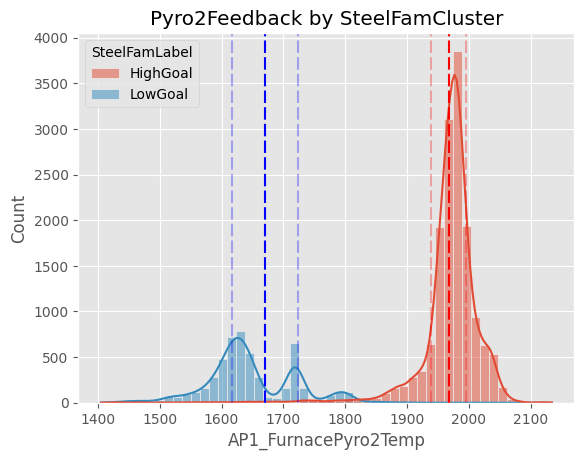

In [16]:
ax = sns.histplot(data=dfSP, x="AP1_FurnacePyro2Temp", hue="SteelFamLabel", kde=True)

ax.set_title("Pyro2Feedback by SteelFamCluster")

pyro2_high_mean=dfSP.drop("WidthFamLabel",axis=1,inplace=False).groupby(["SteelFamCluster","SteelFamLabel"]).mean().pyro2[0].values[0]
pyro2_high_std=dfSP.drop("WidthFamLabel",axis=1,inplace=False).groupby(["SteelFamCluster","SteelFamLabel"]).std().pyro2[0].values[0]
pyro2_low_mean=dfSP.drop("WidthFamLabel",axis=1,inplace=False).groupby(["SteelFamCluster","SteelFamLabel"]).mean().pyro2[1].values[0]
pyro2_low_std=dfSP.drop("WidthFamLabel",axis=1,inplace=False).groupby(["SteelFamCluster","SteelFamLabel"]).std().pyro2[1].values[0]

ax.axvline(pyro2_high_mean, color="red", dashes=(6, 2), alpha=1) #
ax.axvline(pyro2_high_mean+pyro2_high_std, color="red", dashes=(6, 2), alpha=0.3) #
ax.axvline(pyro2_high_mean-pyro2_high_std, color="red", dashes=(6, 2), alpha=0.3) #

ax.axvline(pyro2_low_mean, color="blue", dashes=(6, 2), alpha=1) #
ax.axvline(pyro2_low_mean+pyro2_low_std, color="blue", dashes=(6, 2), alpha=0.3) #
ax.axvline(pyro2_low_mean-pyro2_low_std, color="blue", dashes=(6, 2), alpha=0.3) #

## Filter by Pyro2Feedbck inside 1 std of pyro2goal

In [17]:
mask_HighGoal = (dfSP.SteelFamLabel=="HighGoal") & (dfSP.AP1_FurnacePyro2Temp>=(pyro2_high_mean-pyro2_high_std)) & (dfSP.AP1_FurnacePyro2Temp<=(pyro2_high_mean+pyro2_high_std))
mask_LowGoal = (dfSP.SteelFamLabel=="LowGoal") & (dfSP.AP1_FurnacePyro2Temp>=(pyro2_low_mean-pyro2_low_std)) & (dfSP.AP1_FurnacePyro2Temp<=(pyro2_low_mean+pyro2_low_std))
dfSP_filtered=dfSP.loc[(mask_HighGoal) | (mask_LowGoal),:]
print(dfSP.shape)
print(dfSP_filtered.shape)
dfSP_filtered.head(3)

(21907, 29)
(13158, 29)


,AP1_FurnaceZone0MasterTempFdbk,AP1_FurnaceZone0MasterTempOperatorSetpoint,AP1_FurnaceZone0MasterTempSetpoint,AP1_FurnaceZone1TemperatureSetpoint,AP1_FurnaceZone1TopTemp,AP1_FurnaceZone2TemperatureSetpoint,AP1_FurnaceZone2TopTemp,AP1_FurnaceZone3TemperatureSetpoint,AP1_FurnaceZone3TopTemp,AP1_FurnaceZone4TemperatureSetpoint,...,AP1_FurnaceTV,CurrentGuage,AP1_FurnaceLineSpeed,CurrentWidth,AP1_FurnacePyro2Temp,pyro2,WidthFamCluster,SteelFamCluster,SteelFamLabel,WidthFamLabel
ts,,,,,,,,,,,,,,,,,,,,,
2024-05-09 08:40:00,1553.237427,1626.891968,1626.891968,2050.0,2024.353027,2050.0,1927.593140,2050.0,1969.559082,2000.0,...,38.700146,0.04,124.969482,61.4117,1943.0,1980.0,1.0,0.0,HighGoal,BigWidth
2024-05-09 08:42:00,1659.927856,1793.174438,1793.174438,2050.0,2058.332031,2050.0,1938.329590,2050.0,2006.133911,2050.0,...,38.700146,0.04,124.969482,61.4117,1958.0,1980.0,1.0,0.0,HighGoal,BigWidth
2024-05-09 08:44:00,1794.752930,1960.915527,1960.915527,2050.0,2075.686523,2050.0,1962.483887,2050.0,2010.333496,2050.0,...,38.719051,0.04,125.030533,61.4117,1983.0,1980.0,1.0,0.0,HighGoal,BigWidth


In [18]:
#CHECK NAN VALUES
print(dfSP_filtered.shape)
dfSP_filtered.isna().sum(axis=0)

(13158, 29)


AP1_FurnaceZone0MasterTempFdbk                4989
AP1_FurnaceZone0MasterTempOperatorSetpoint    3419
AP1_FurnaceZone0MasterTempSetpoint            3419
AP1_FurnaceZone1TemperatureSetpoint              0
AP1_FurnaceZone1TopTemp                          0
AP1_FurnaceZone2TemperatureSetpoint              0
AP1_FurnaceZone2TopTemp                          0
AP1_FurnaceZone3TemperatureSetpoint             14
AP1_FurnaceZone3TopTemp                          0
AP1_FurnaceZone4TemperatureSetpoint              0
AP1_FurnaceZone4TopTemp                          0
AP1_FurnaceZone5TemperatureSetpoint             13
AP1_FurnaceZone5TopTemp                          0
AP1_FurnaceZone6TemperatureSetpoint              0
AP1_FurnaceZone6TopTemp                          0
AP1_FurnaceZone7TemperatureSetpoint             15
AP1_FurnaceZone7TopTemp                          0
AP1_FurnaceZone8TemperatureSetpoint             17
AP1_FurnaceZone8TopTemp                          0
AP1_FurnaceTV                  

## Check for width and AP1_FurnaceLineSpeed dist

Text(0.5, 1.0, 'AP1_FurnaceLineSpeed by WidthFamCluster')

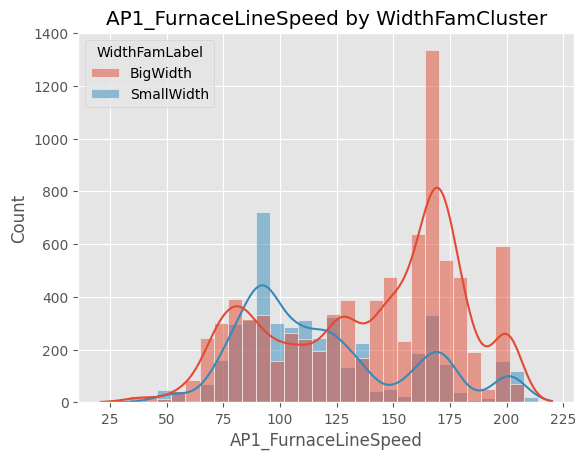

In [19]:
ax = sns.histplot(data=dfSP_filtered, x="AP1_FurnaceLineSpeed", hue="WidthFamLabel", kde=True)##SteelFamLabel,WidthFamCluster

ax.set_title("AP1_FurnaceLineSpeed by WidthFamCluster")


Text(0.5, 1.0, 'AP1_FurnaceTV by SteelFamCluster')

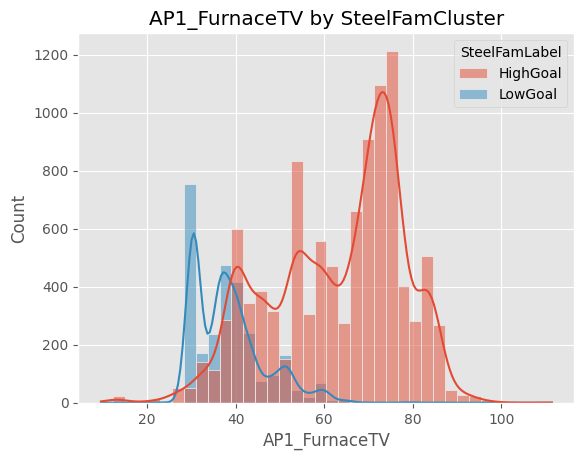

In [20]:
ax = sns.histplot(data=dfSP_filtered, x="AP1_FurnaceTV", hue="SteelFamLabel", kde=True)##SteelFamLabel,WidthFamCluster

ax.set_title("AP1_FurnaceTV by SteelFamCluster")

Text(0.5, 1.0, 'CurrentWidth by WidthFamCluster')

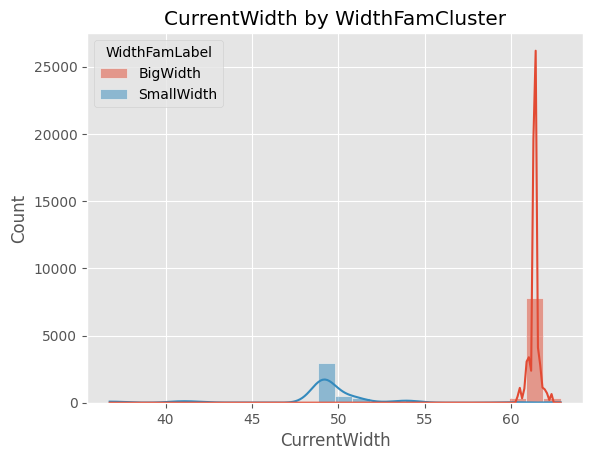

In [21]:
ax = sns.histplot(data=dfSP_filtered, x="CurrentWidth", hue="WidthFamLabel", kde=True)##SteelFamLabel,WidthFamCluster

ax.set_title("CurrentWidth by WidthFamCluster")


Text(0.5, 1.0, 'CurrentGuage by SteelFamCluster')

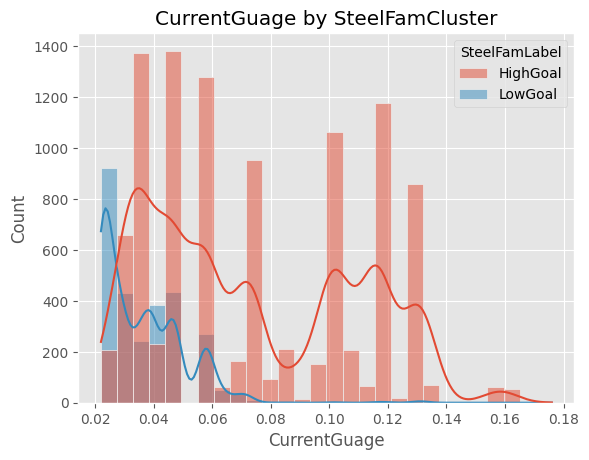

In [22]:
ax = sns.histplot(data=dfSP_filtered, x="CurrentGuage", hue="SteelFamLabel", kde=True)##SteelFamLabel,WidthFamCluster

ax.set_title("CurrentGuage by SteelFamCluster")


Text(0.5, 1.0, 'AP1_FurnaceLineSpeed vs CurrentWidth by WidthFamCluster')

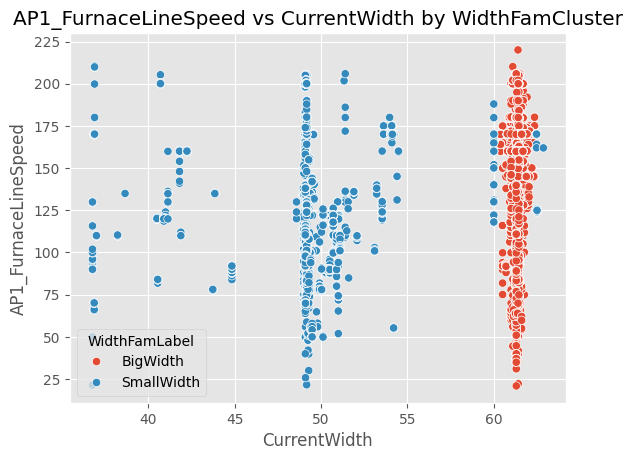

In [23]:
ax = sns.scatterplot(data=dfSP_filtered, x="CurrentWidth", y="AP1_FurnaceLineSpeed", hue="WidthFamLabel")#SteelFamLabel,WidthFamCluster

ax.set_title("AP1_FurnaceLineSpeed vs CurrentWidth by WidthFamCluster")

Text(0.5, 1.0, 'AP1_FurnaceLineSpeed vs CurrentGuage by SteelFamCluster')

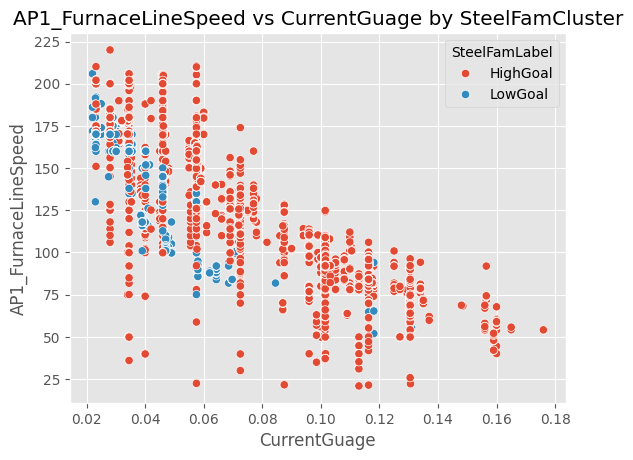

In [24]:
ax = sns.scatterplot(data=dfSP_filtered, x="CurrentGuage", y="AP1_FurnaceLineSpeed", hue="SteelFamLabel")#SteelFamLabel,WidthFamCluster

ax.set_title("AP1_FurnaceLineSpeed vs CurrentGuage by SteelFamCluster")

## Discretize filtered CurrentGuage to create CurrentGuageDisc and CurrentGuageLabel

Text(0.5, 1.0, 'CurrentGuage')

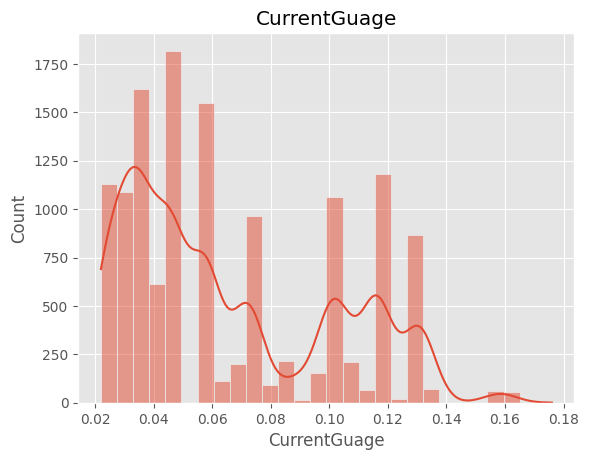

In [25]:
ax = sns.histplot(data=dfSP_filtered, x="CurrentGuage", kde=True)##SteelFamLabel,WidthFamCluster, hue="SteelFamLabel"

ax.set_title("CurrentGuage")

[0 1]


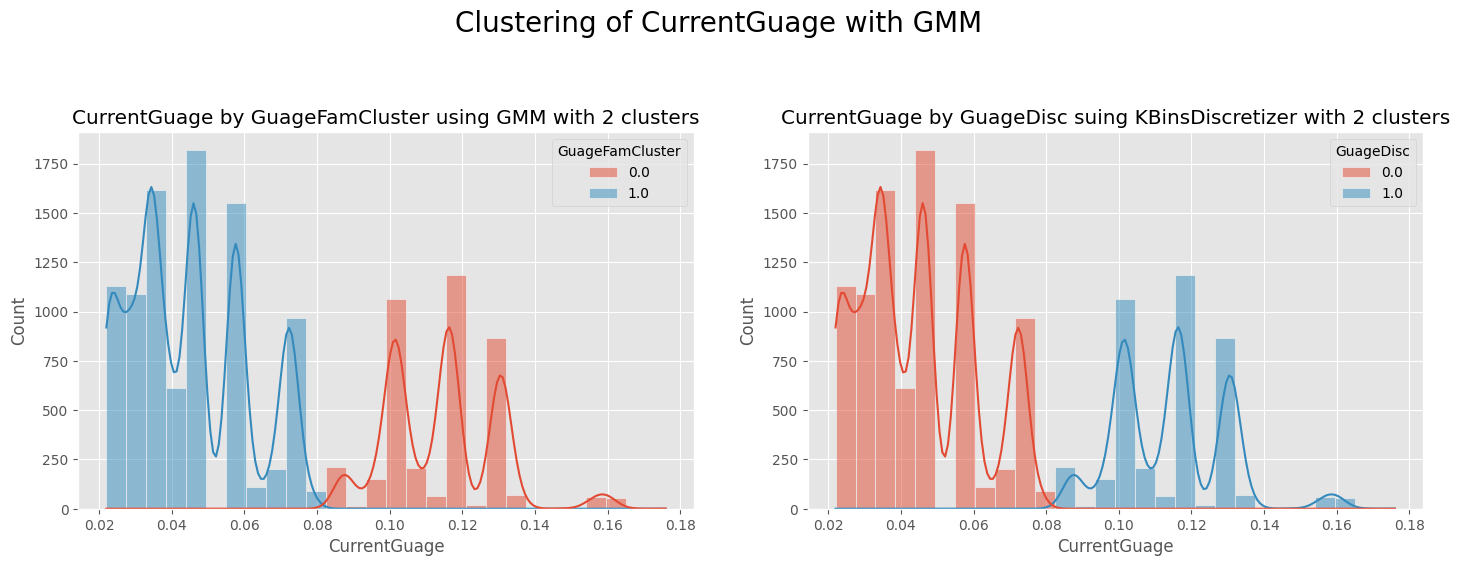

In [26]:
n_clusters=2
modelGMM = GaussianMixture(n_components=n_clusters, random_state=42).fit(dfSP_filtered.CurrentGuage.dropna().to_numpy().reshape(-1,1))
clustersGMM = modelGMM.predict(dfSP_filtered.CurrentGuage.dropna().to_numpy().reshape(-1,1))
print(np.unique(clustersGMM))
c=0
fig,ax = plt.subplots(1,2,figsize=(15,6),facecolor='white')
fig.suptitle("Clustering of CurrentGuage with GMM",fontsize=20)
#Compute df
clusteringGMM_Long = pd.DataFrame(dfSP_filtered.CurrentGuage,columns=['CurrentGuage'])#.reset_index(drop=True)
for t in dfSP_filtered.index:
    if np.isnan(clusteringGMM_Long.loc[t,"CurrentGuage"]):
        clusteringGMM_Long.loc[t,"GuageFamCluster"] = np.nan
    else:
        clusteringGMM_Long.loc[t,"GuageFamCluster"] = clustersGMM[c]
        c+=1

#dfSP_filtered.loc[:,"CurrentGuageLabel"]=dfSP_filtered.loc[:,"CurrentGuageDisc"].copy().map(lambda x: "LowSpeed" if x==0.0 else "MediumSpeed" if x==1.0 else "HighSpeed" if x==2.0 else np.nan)
#dfSP_filtered.loc[:,"CurrentGuageLabel"]=dfSP_filtered.loc[:,"CurrentGuageDisc"].copy().map(lambda x: "SmallThickness" if x==0.0 else "BigThickness" if x==1.0 else np.nan)

sns.histplot(data=clusteringGMM_Long, x="CurrentGuage", hue="GuageFamCluster", kde=True, ax=ax[0])##SteelFamLabel,WidthFamCluster
ax[0].set_title(f"CurrentGuage by GuageFamCluster using GMM with {n_clusters} clusters")

CurrentGuageDisc=KBinsDiscretizer(
    n_bins=n_clusters, subsample=None, encode='ordinal', strategy='kmeans', random_state=42
).fit_transform(dfSP_filtered.CurrentGuage.values.reshape(-1,1))#quantile, uniform, kmeans

dfGuage=pd.DataFrame(data={"CurrentGuage":dfSP_filtered.CurrentGuage.values.reshape(1,-1)[0],"GuageDisc":CurrentGuageDisc.reshape(1,-1)[0]})
sns.histplot(data=dfGuage, x="CurrentGuage", hue="GuageDisc", kde=True, ax=ax[1])##SteelFamLabel,WidthFamCluster
ax[1].set_title(f"CurrentGuage by GuageDisc suing KBinsDiscretizer with {n_clusters} clusters")

fig.tight_layout(pad=3)

In [27]:
dfSP_filtered.loc[:,"GuageFamCluster"]=clusteringGMM_Long.GuageFamCluster

#Assign meaningfull labels to clusters
a=pd.DataFrame(modelGMM.means_,columns=["center"]).assign(label = lambda x: x.iloc[:,0].map(lambda y: "BigThickness" if y==x.max()[0] else "SmallThickness")).reset_index(names="cluster")

#Check mapping works before applying to df
# Defining all the conditions for labelling
def condition(y):
    if y==a.loc[a.label=="BigThickness","cluster"].values[0]:
        return "BigThickness"
    elif np.isnan(y):
        return np.nan
    elif y==a.loc[a.label=="SmallThickness","cluster"].values[0]:
        return "SmallThickness"
    else:
        pass

dfSP_filtered.loc[:,'GuageFamLabel']=clusteringGMM_Long.GuageFamCluster.map(condition)#.astype("category")

C:\Users\carlo\AppData\Local\Temp\ipykernel_14828\258928408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSP_filtered.loc[:,"GuageFamCluster"]=clusteringGMM_Long.GuageFamCluster
C:\Users\carlo\AppData\Local\Temp\ipykernel_14828\258928408.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a=pd.DataFrame(modelGMM.means_,columns=["center"]).assign(label = lambda x: x.iloc[:,0].map(lambda y: "BigThickness" if y==x.max()[0] else "SmallThickness")).reset_index(names="cluster")
C:\Users\carlo\AppData\Local\Temp\ipykernel_14828\258928408.py:18: SettingWithCopyW

Text(0.5, 1.0, 'CurrentGuage by GuageFamLabel')

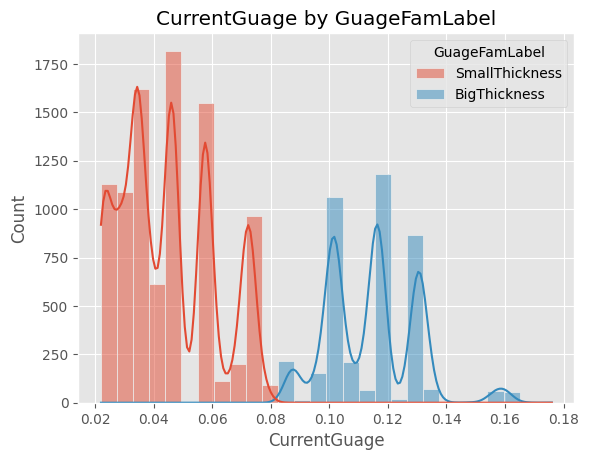

In [28]:
ax = sns.histplot(data=dfSP_filtered, x="CurrentGuage", kde=True, hue="GuageFamLabel")##SteelFamLabel,WidthFamCluster, hue="SteelFamLabel"

ax.set_title("CurrentGuage by GuageFamLabel")

In [29]:
dfSP_filtered.head(2)

,AP1_FurnaceZone0MasterTempFdbk,AP1_FurnaceZone0MasterTempOperatorSetpoint,AP1_FurnaceZone0MasterTempSetpoint,AP1_FurnaceZone1TemperatureSetpoint,AP1_FurnaceZone1TopTemp,AP1_FurnaceZone2TemperatureSetpoint,AP1_FurnaceZone2TopTemp,AP1_FurnaceZone3TemperatureSetpoint,AP1_FurnaceZone3TopTemp,AP1_FurnaceZone4TemperatureSetpoint,...,AP1_FurnaceLineSpeed,CurrentWidth,AP1_FurnacePyro2Temp,pyro2,WidthFamCluster,SteelFamCluster,SteelFamLabel,WidthFamLabel,GuageFamCluster,GuageFamLabel
ts,,,,,,,,,,,,,,,,,,,,,
2024-05-09 08:40:00,1553.237427,1626.891968,1626.891968,2050.0,2024.353027,2050.0,1927.59314,2050.0,1969.559082,2000.0,...,124.969482,61.4117,1943.0,1980.0,1.0,0.0,HighGoal,BigWidth,1.0,SmallThickness
2024-05-09 08:42:00,1659.927856,1793.174438,1793.174438,2050.0,2058.332031,2050.0,1938.32959,2050.0,2006.133911,2050.0,...,124.969482,61.4117,1958.0,1980.0,1.0,0.0,HighGoal,BigWidth,1.0,SmallThickness


## Discretize filtered AP1_FurnaceLineSpeed to create LineSpeedDisc and LineSpeedLabel

In [30]:
LineSpeedDisc=KBinsDiscretizer(
    n_bins=3, subsample=None, encode='ordinal', strategy='quantile', random_state=42
).fit_transform(dfSP_filtered.AP1_FurnaceLineSpeed.values.reshape(-1,1))#quantile, uniform, kmeans

In [31]:
dfSP_filtered.loc[:,"LineSpeedDisc"]=LineSpeedDisc

C:\Users\carlo\AppData\Local\Temp\ipykernel_14828\2854193000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSP_filtered.loc[:,"LineSpeedDisc"]=LineSpeedDisc


In [32]:
dfSP_filtered.loc[:,"LineSpeedLabel"]=dfSP_filtered.loc[:,"LineSpeedDisc"].copy().map(lambda x: "LowSpeed" if x==0.0 else "MediumSpeed" if x==1.0 else "HighSpeed" if x==2.0 else np.nan)

C:\Users\carlo\AppData\Local\Temp\ipykernel_14828\665448194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSP_filtered.loc[:,"LineSpeedLabel"]=dfSP_filtered.loc[:,"LineSpeedDisc"].copy().map(lambda x: "LowSpeed" if x==0.0 else "MediumSpeed" if x==1.0 else "HighSpeed" if x==2.0 else np.nan)


Text(0.5, 1.0, 'LineSpeedDisc by WidthFamCluster')

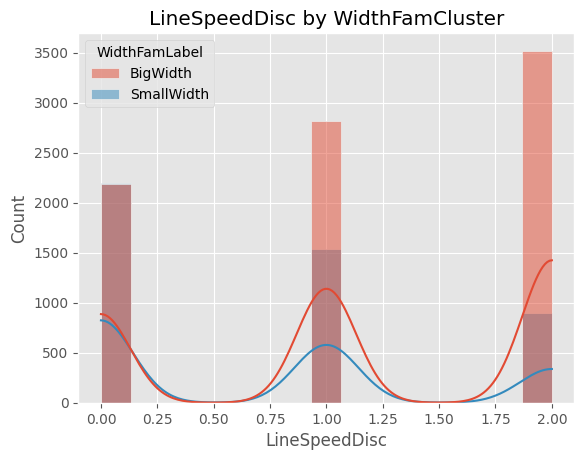

In [33]:
ax = sns.histplot(data=dfSP_filtered, x="LineSpeedDisc", hue="WidthFamLabel", kde=True)##SteelFamLabel,WidthFamCluster

ax.set_title("LineSpeedDisc by WidthFamCluster")


Text(0.5, 1.0, 'AP1_FurnaceLineSpeed by LineSpeedLabel')

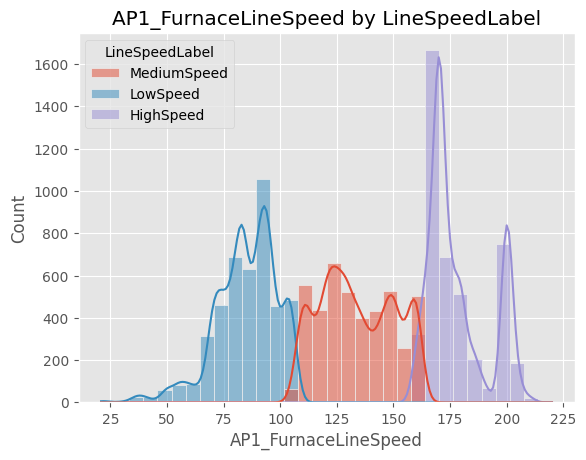

In [34]:
ax = sns.histplot(data=dfSP_filtered, x="AP1_FurnaceLineSpeed", hue="LineSpeedLabel", kde=True)##SteelFamLabel,WidthFamCluster

ax.set_title("AP1_FurnaceLineSpeed by LineSpeedLabel")

In [35]:
dfSP_filtered.dtypes

AP1_FurnaceZone0MasterTempFdbk                float64
AP1_FurnaceZone0MasterTempOperatorSetpoint    float64
AP1_FurnaceZone0MasterTempSetpoint            float64
AP1_FurnaceZone1TemperatureSetpoint           float64
AP1_FurnaceZone1TopTemp                       float64
AP1_FurnaceZone2TemperatureSetpoint           float64
AP1_FurnaceZone2TopTemp                       float64
AP1_FurnaceZone3TemperatureSetpoint           float64
AP1_FurnaceZone3TopTemp                       float64
AP1_FurnaceZone4TemperatureSetpoint           float64
AP1_FurnaceZone4TopTemp                       float64
AP1_FurnaceZone5TemperatureSetpoint           float64
AP1_FurnaceZone5TopTemp                       float64
AP1_FurnaceZone6TemperatureSetpoint           float64
AP1_FurnaceZone6TopTemp                       float64
AP1_FurnaceZone7TemperatureSetpoint           float64
AP1_FurnaceZone7TopTemp                       float64
AP1_FurnaceZone8TemperatureSetpoint           float64
AP1_FurnaceZone8TopTemp     

## Compute mean & std TopTempSP for each Zone by grade, width & line speed

In [36]:
dfSP_filtered.loc[:,"GradeWidthSpeed"]=dfSP_filtered['SteelFamLabel']+'-'+dfSP_filtered['WidthFamLabel']+'-'+dfSP_filtered['LineSpeedLabel']
dfSP_filtered.loc[:,"GradeWidthGuageSpeed"]=dfSP_filtered['SteelFamLabel']+'-'+dfSP_filtered['WidthFamLabel']+'-'+dfSP_filtered['GuageFamLabel']+'-'+dfSP_filtered['LineSpeedLabel']

C:\Users\carlo\AppData\Local\Temp\ipykernel_14828\4154901588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSP_filtered.loc[:,"GradeWidthSpeed"]=dfSP_filtered['SteelFamLabel']+'-'+dfSP_filtered['WidthFamLabel']+'-'+dfSP_filtered['LineSpeedLabel']
C:\Users\carlo\AppData\Local\Temp\ipykernel_14828\4154901588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSP_filtered.loc[:,"GradeWidthGuageSpeed"]=dfSP_filtered['SteelFamLabel']+'-'+dfSP_filtered['WidthFamLabel']+'-'+dfSP_filtered['GuageFamLabel']+

In [37]:
dfSPmean=dfSP_filtered.drop(["GradeWidthSpeed","SteelFamCluster","WidthFamCluster","LineSpeedDisc","GuageFamLabel","GuageFamCluster","GradeWidthGuageSpeed",],axis=1,inplace=False).groupby(["SteelFamLabel","WidthFamLabel","LineSpeedLabel"]).mean()
dfSPmean=dfSPmean.loc[:,dfSPmean.columns.str.contains(".*[Ss].*[Pp].*",regex=True)]

dfSPstd=dfSP_filtered.drop(["GradeWidthSpeed","SteelFamCluster","WidthFamCluster","LineSpeedDisc","GuageFamLabel","GuageFamCluster","GradeWidthGuageSpeed",],axis=1,inplace=False).groupby(["SteelFamLabel","WidthFamLabel","LineSpeedLabel"]).std()
dfSPstd=dfSPstd.loc[:,dfSPstd.columns.str.contains(".*[Ss].*[Pp].*",regex=True)]

In [38]:
dfSP_filtered.drop(["SteelFamCluster","SteelFamLabel","WidthFamCluster","WidthFamLabel","LineSpeedDisc","LineSpeedLabel","GuageFamLabel","GuageFamCluster","GradeWidthGuageSpeed",],axis=1,inplace=False).groupby("GradeWidthSpeed").mean()

,AP1_FurnaceZone0MasterTempFdbk,AP1_FurnaceZone0MasterTempOperatorSetpoint,AP1_FurnaceZone0MasterTempSetpoint,AP1_FurnaceZone1TemperatureSetpoint,AP1_FurnaceZone1TopTemp,AP1_FurnaceZone2TemperatureSetpoint,AP1_FurnaceZone2TopTemp,AP1_FurnaceZone3TemperatureSetpoint,AP1_FurnaceZone3TopTemp,AP1_FurnaceZone4TemperatureSetpoint,...,AP1_FurnaceZone7TemperatureSetpoint,AP1_FurnaceZone7TopTemp,AP1_FurnaceZone8TemperatureSetpoint,AP1_FurnaceZone8TopTemp,AP1_FurnaceTV,CurrentGuage,AP1_FurnaceLineSpeed,CurrentWidth,AP1_FurnacePyro2Temp,pyro2
GradeWidthSpeed,,,,,,,,,,,,,,,,,,,,,
HighGoal-BigWidth-HighSpeed,1823.373089,1824.760201,1824.760201,2054.293567,2045.347805,2051.223534,2012.921799,2057.011401,2056.519243,2051.366042,...,2042.081466,2040.720579,2042.187373,2039.337034,50.001168,0.035948,180.760293,61.311089,1969.409609,1967.019544
HighGoal-BigWidth-LowSpeed,2008.378486,1933.605764,1933.605764,2202.188235,2093.658684,2201.211765,2019.423304,2203.027804,2150.533157,2201.282353,...,2204.118756,2137.462761,2203.760603,2125.880428,67.583267,0.109210,81.937748,61.363118,1971.527059,1975.138824
HighGoal-BigWidth-MediumSpeed,1912.832236,1963.555851,1963.510324,2108.306673,2071.102089,2104.081353,2004.153951,2109.580660,2096.415359,2104.581810,...,2109.784700,2092.909264,2109.713434,2087.989637,60.194220,0.057604,136.699494,61.358694,1973.159963,1971.457952
HighGoal-SmallWidth-HighSpeed,1794.158559,2023.643061,2023.643061,2101.706539,2098.784823,2101.706539,2073.494921,2101.706539,2102.737246,2101.706539,...,2103.102073,2102.688173,2103.102073,2100.324879,67.606703,0.047531,185.302721,48.143180,1972.878788,1980.000000
HighGoal-SmallWidth-LowSpeed,2016.021960,2132.484804,2132.484804,2179.843831,2134.499110,2179.823009,2085.617152,2179.817803,2160.182877,2179.820406,...,2182.566372,2151.762061,2182.597605,2143.649975,75.526245,0.112834,87.221983,48.894978,1973.338365,1976.543467
HighGoal-SmallWidth-MediumSpeed,1714.245662,1753.663390,1753.663390,2132.242857,2115.272938,2131.966667,2083.582877,2132.242857,2125.538737,2131.985714,...,2086.066667,2073.214984,2086.066667,2069.656898,63.248524,0.064987,128.391892,48.218678,1966.162857,1963.114286
LowGoal-BigWidth-HighSpeed,1289.208589,1287.651364,1287.651364,1854.001883,1853.801533,1854.001883,1845.861551,1854.745042,1856.903774,1853.742938,...,1788.682720,1790.123014,1787.662890,1789.620394,32.367041,0.024585,170.268917,61.387746,1636.815443,1640.400188
LowGoal-BigWidth-LowSpeed,1493.247881,1499.070540,1499.070540,1955.156250,1950.641405,1953.984375,1912.606319,1953.984375,1946.216434,1953.984375,...,1786.953125,1785.924601,1788.515625,1786.294910,45.972373,0.062803,94.192619,60.855337,1671.515625,1677.187500
LowGoal-BigWidth-MediumSpeed,1450.986352,1451.035277,1451.035277,1949.704944,1948.839365,1949.704944,1898.170086,1949.704944,1951.483468,1949.704944,...,1833.881789,1835.080702,1833.123003,1834.341667,44.254769,0.040201,143.758785,61.374141,1654.223285,1661.746411


In [39]:

dfSPmean

AP1_FurnaceZone0MasterTempFdbk  \
SteelFamLabel WidthFamLabel LineSpeedLabel                                   
HighGoal      BigWidth      HighSpeed                          1823.373089   
                            LowSpeed                           2008.378486   
                            MediumSpeed                        1912.832236   
              SmallWidth    HighSpeed                          1794.158559   
                            LowSpeed                           2016.021960   
                            MediumSpeed                        1714.245662   
LowGoal       BigWidth      HighSpeed                          1289.208589   
                            LowSpeed                           1493.247881   
                            MediumSpeed                        1450.986352   
              SmallWidth    HighSpeed                          1259.353928   
                            LowSpeed                           1369.400022   
                            MediumSpeed                        1468.010188   

                                            AP1_FurnaceZone0MasterTempOperatorSetpoint  \
SteelFamLabel WidthFamLabel LineSpeedLabel                                               
HighGoal      BigWidth      HighSpeed                                      1824.760201   
                            LowSpeed                                       1933.605764   
                            MediumSpeed                                    1963.555851   
              SmallWidth    HighSpeed                                      2023.643061   
                            LowSpeed                                       2132.484804   
                            MediumSpeed                                    1753.663390   
LowGoal       BigWidth      HighSpeed                                      1287.651364   
                            LowSpeed                                       1499.070540   
                            MediumSpeed                                    1451.035277   
              SmallWidth    HighSpeed                                      1258.681977   
                            LowSpeed                                       1369.393950   
                            MediumSpeed                                    1467.550083   

                                            AP1_FurnaceZone0MasterTempSetpoint  \
SteelFamLabel WidthFamLabel LineSpeedLabel                                       
HighGoal      BigWidth      HighSpeed                              1824.760201   
                            LowSpeed                               1933.605764   
                            MediumSpeed                            1963.510324   
              SmallWidth    HighSpeed                              2023.643061   
                            LowSpeed                               2132.484804   
                            MediumSpeed                            1753.663390   
LowGoal       BigWidth      HighSpeed                              1287.651364   
                            LowSpeed                               1499.070540   
                            MediumSpeed                            1451.035277   
              SmallWidth    HighSpeed                              1258.681977   
                            LowSpeed                               1369.393950   
                            MediumSpeed                            1467.550083   

                                            AP1_FurnaceZone1TemperatureSetpoint  \
SteelFamLabel WidthFamLabel LineSpeedLabel                                        
HighGoal      BigWidth      HighSpeed                               2054.293567   
                            LowSpeed                                2202.188235   
                            MediumSpeed                             2108.306673   
              SmallWidth    HighSpeed                               2101.706539   
                            LowSpeed       

In [40]:

dfSPstd

AP1_FurnaceZone0MasterTempFdbk  \
SteelFamLabel WidthFamLabel LineSpeedLabel                                   
HighGoal      BigWidth      HighSpeed                           411.297139   
                            LowSpeed                            229.200945   
                            MediumSpeed                         357.116873   
              SmallWidth    HighSpeed                           539.663184   
                            LowSpeed                            376.546984   
                            MediumSpeed                         427.825755   
LowGoal       BigWidth      HighSpeed                            92.811357   
                            LowSpeed                             78.021773   
                            MediumSpeed                          98.837756   
              SmallWidth    HighSpeed                            24.495353   
                            LowSpeed                            173.614802   
                            MediumSpeed                         110.374611   

                                            AP1_FurnaceZone0MasterTempOperatorSetpoint  \
SteelFamLabel WidthFamLabel LineSpeedLabel                                               
HighGoal      BigWidth      HighSpeed                                       371.710896   
                            LowSpeed                                        413.145541   
                            MediumSpeed                                     313.532769   
              SmallWidth    HighSpeed                                       278.475896   
                            LowSpeed                                        203.837098   
                            MediumSpeed                                     420.743263   
LowGoal       BigWidth      HighSpeed                                        73.836485   
                            LowSpeed                                        106.293878   
                            MediumSpeed                                      99.578942   
              SmallWidth    HighSpeed                                        23.259090   
                            LowSpeed                                        173.585266   
                            MediumSpeed                                     110.418941   

                                            AP1_FurnaceZone0MasterTempSetpoint  \
SteelFamLabel WidthFamLabel LineSpeedLabel                                       
HighGoal      BigWidth      HighSpeed                               371.710896   
                            LowSpeed                                413.145541   
                            MediumSpeed                             313.463300   
              SmallWidth    HighSpeed                               278.475896   
                            LowSpeed                                203.837098   
                            MediumSpeed                             420.743263   
LowGoal       BigWidth      HighSpeed                                73.836485   
                            LowSpeed                                106.293878   
                            MediumSpeed                              99.578942   
              SmallWidth    HighSpeed                                23.259090   
                            LowSpeed                                173.585266   
                            MediumSpeed                             110.418941   

                                            AP1_FurnaceZone1TemperatureSetpoint  \
SteelFamLabel WidthFamLabel LineSpeedLabel                                        
HighGoal      BigWidth      HighSpeed                                 65.545492   
                            LowSpeed                                 107.147738   
                            MediumSpeed                               90.086331   
              SmallWidth    HighSpeed                                 59.304058   
                            LowSpeed       

In [41]:
SPdict={}
for x in dfSP_filtered.columns[dfSP_filtered.columns.str.contains(".*Temp.*[Ss].*[Pp].*",regex=True)]:
    SPdict[x]=("mean","std")#(np.nanmean,np.nanstd)
SPdict

{'AP1_FurnaceZone0MasterTempOperatorSetpoint': ('mean', 'std'),
 'AP1_FurnaceZone0MasterTempSetpoint': ('mean', 'std'),
 'AP1_FurnaceZone1TemperatureSetpoint': ('mean', 'std'),
 'AP1_FurnaceZone2TemperatureSetpoint': ('mean', 'std'),
 'AP1_FurnaceZone3TemperatureSetpoint': ('mean', 'std'),
 'AP1_FurnaceZone4TemperatureSetpoint': ('mean', 'std'),
 'AP1_FurnaceZone5TemperatureSetpoint': ('mean', 'std'),
 'AP1_FurnaceZone6TemperatureSetpoint': ('mean', 'std'),
 'AP1_FurnaceZone7TemperatureSetpoint': ('mean', 'std'),
 'AP1_FurnaceZone8TemperatureSetpoint': ('mean', 'std')}

In [42]:
dfSP_statisticalMeanStd=dfSP_filtered.drop(["SteelFamCluster","SteelFamLabel","WidthFamCluster","WidthFamLabel","LineSpeedDisc","LineSpeedLabel","GuageFamLabel","GuageFamCluster",],axis=1,inplace=False).groupby("GradeWidthSpeed").agg(SPdict)
dfSP_statisticalMeanStd.to_csv(path_or_buf="TempSP_statistical_inference.csv",na_rep="Nan")
dfSP_statisticalMeanStd

AP1_FurnaceZone0MasterTempOperatorSetpoint  \
                                                                      mean   
GradeWidthSpeed                                                              
HighGoal-BigWidth-HighSpeed                                    1824.760201   
HighGoal-BigWidth-LowSpeed                                     1933.605764   
HighGoal-BigWidth-MediumSpeed                                  1963.555851   
HighGoal-SmallWidth-HighSpeed                                  2023.643061   
HighGoal-SmallWidth-LowSpeed                                   2132.484804   
HighGoal-SmallWidth-MediumSpeed                                1753.663390   
LowGoal-BigWidth-HighSpeed                                     1287.651364   
LowGoal-BigWidth-LowSpeed                                      1499.070540   
LowGoal-BigWidth-MediumSpeed                                   1451.035277   
LowGoal-SmallWidth-HighSpeed                                   1258.681977   
LowGoal-SmallWidth-LowSpeed                                    1369.393950   
LowGoal-SmallWidth-MediumSpeed                                 1467.550083   

                                             \
                                        std   
GradeWidthSpeed                               
HighGoal-BigWidth-HighSpeed      371.710896   
HighGoal-BigWidth-LowSpeed       413.145541   
HighGoal-BigWidth-MediumSpeed    313.532769   
HighGoal-SmallWidth-HighSpeed    278.475896   
HighGoal-SmallWidth-LowSpeed     203.837098   
HighGoal-SmallWidth-MediumSpeed  420.743263   
LowGoal-BigWidth-HighSpeed        73.836485   
LowGoal-BigWidth-LowSpeed        106.293878   
LowGoal-BigWidth-MediumSpeed      99.578942   
LowGoal-SmallWidth-HighSpeed      23.259090   
LowGoal-SmallWidth-LowSpeed      173.585266   
LowGoal-SmallWidth-MediumSpeed   110.418941   

                                AP1_FurnaceZone0MasterTempSetpoint  \
                                                              mean   
GradeWidthSpeed                                                      
HighGoal-BigWidth-HighSpeed                            1824.760201   
HighGoal-BigWidth-LowSpeed                             1933.605764   
HighGoal-BigWidth-MediumSpeed                          1963.510324   
HighGoal-SmallWidth-HighSpeed                          2023.643061   
HighGoal-SmallWidth-LowSpeed                           2132.484804   
HighGoal-SmallWidth-MediumSpeed                        1753.663390   
LowGoal-BigWidth-HighSpeed                             1287.651364   
LowGoal-BigWidth-LowSpeed                              1499.070540   
LowGoal-BigWidth-MediumSpeed                           1451.035277   
LowGoal-SmallWidth-HighSpeed                           1258.681977   
LowGoal-SmallWidth-LowSpeed                            1369.393950   
LowGoal-SmallWidth-MediumSpeed                         1467.550083   

                                             \
                                        std   
GradeWidthSpeed                               
HighGoal-BigWidth-HighSpeed      371.710896   
HighGoal-BigWidth-LowSpeed       413.145541   
HighGoal-BigWidth-MediumSpeed    313.463300   
HighGoal-SmallWidth-HighSpeed    278.475896   
HighGoal-SmallWidth-LowSpeed     203.837098   
HighGoal-SmallWidth-MediumSpeed  420.743263   
LowGoal-BigWidth-HighSpeed        73.836485   
LowGoal-BigWidth-LowSpeed        106.293878   
LowGoal-BigWidth-MediumSpeed      99.578942   
LowGoal-SmallWidth-HighSpeed      23.259090   
LowGoal-SmallWidth-LowSpeed      173.585266   
LowGoal-SmallWidth-MediumSpeed   110.418941   

                                AP1_FurnaceZone1TemperatureSetpoint  \
                                                               mean   
GradeWidthSpeed                                                       
HighGoal-BigWidth-HighSpeed                             2054.293567   
HighGoal-BigWidth-LowSpeed                              2202.188235   
HighGoal-BigWidth-MediumSpeed              

## Compute mean & std TopTempSP for each Zone by grade, width, guage & line speed

In [43]:
dfSPmean=dfSP_filtered.drop(["GradeWidthSpeed","SteelFamCluster","WidthFamCluster","LineSpeedDisc","GuageFamCluster","GradeWidthGuageSpeed",],axis=1,inplace=False).groupby(["SteelFamLabel","WidthFamLabel","GuageFamLabel","LineSpeedLabel"]).mean()
dfSPmean=dfSPmean.loc[:,dfSPmean.columns.str.contains(".*[Ss].*[Pp].*",regex=True)]

dfSPstd=dfSP_filtered.drop(["GradeWidthSpeed","SteelFamCluster","WidthFamCluster","LineSpeedDisc","GuageFamCluster","GradeWidthGuageSpeed",],axis=1,inplace=False).groupby(["SteelFamLabel","WidthFamLabel","GuageFamLabel","LineSpeedLabel"]).std()
dfSPstd=dfSPstd.loc[:,dfSPstd.columns.str.contains(".*[Ss].*[Pp].*",regex=True)]

In [44]:
dfSP_filtered.drop(["SteelFamCluster","SteelFamLabel","WidthFamCluster","WidthFamLabel","LineSpeedDisc","LineSpeedLabel","GuageFamLabel","GuageFamCluster","GradeWidthSpeed",],axis=1,inplace=False).groupby("GradeWidthGuageSpeed").mean()

,AP1_FurnaceZone0MasterTempFdbk,AP1_FurnaceZone0MasterTempOperatorSetpoint,AP1_FurnaceZone0MasterTempSetpoint,AP1_FurnaceZone1TemperatureSetpoint,AP1_FurnaceZone1TopTemp,AP1_FurnaceZone2TemperatureSetpoint,AP1_FurnaceZone2TopTemp,AP1_FurnaceZone3TemperatureSetpoint,AP1_FurnaceZone3TopTemp,AP1_FurnaceZone4TemperatureSetpoint,...,AP1_FurnaceZone7TemperatureSetpoint,AP1_FurnaceZone7TopTemp,AP1_FurnaceZone8TemperatureSetpoint,AP1_FurnaceZone8TopTemp,AP1_FurnaceTV,CurrentGuage,AP1_FurnaceLineSpeed,CurrentWidth,AP1_FurnacePyro2Temp,pyro2
GradeWidthGuageSpeed,,,,,,,,,,,,,,,,,,,,,
HighGoal-BigWidth-BigThickness-LowSpeed,2066.676950,1942.501614,1942.501614,2228.901221,2110.342904,2228.901221,2025.399183,2229.949972,2170.928621,2228.734739,...,2229.958310,2154.471639,2229.535853,2140.748519,70.578634,0.117066,78.764950,61.359102,1973.180355,1974.755827
HighGoal-BigWidth-BigThickness-MediumSpeed,2114.262022,2300.000000,2300.000000,2286.904762,2121.016625,2286.904762,2048.601760,2297.983871,2190.795085,2285.317460,...,2296.451613,2159.664307,2296.451613,2141.189445,75.089539,0.087476,110.874672,61.427700,1978.730159,1980.158730
HighGoal-BigWidth-SmallThickness-HighSpeed,1823.373089,1824.760201,1824.760201,2054.293567,2045.347805,2051.223534,2012.921799,2057.011401,2056.519243,2051.366042,...,2042.081466,2040.720579,2042.187373,2039.337034,50.001168,0.035948,180.760293,61.311089,1969.409609,1967.019544
HighGoal-BigWidth-SmallThickness-LowSpeed,1878.711086,1909.498921,1909.498921,2053.157895,2000.578295,2046.733746,1986.084189,2053.080495,2036.747937,2048.126935,...,2060.201238,2042.571124,2060.201238,2042.932132,50.872275,0.065385,99.638621,61.385524,1962.303406,1977.275542
HighGoal-BigWidth-SmallThickness-MediumSpeed,1904.399659,1951.750793,1951.703669,2103.011765,2069.622270,2098.661176,2002.836204,2104.070755,2093.617278,2099.223529,...,2104.328147,2090.930173,2104.249646,2086.412419,59.752618,0.056719,137.465124,61.356648,1972.994824,1971.200000
HighGoal-SmallWidth-BigThickness-LowSpeed,2028.380870,2147.439074,2147.439074,2184.405145,2139.744771,2184.383708,2089.299191,2184.405145,2165.324279,2184.407824,...,2185.983387,2155.562533,2186.015541,2147.096264,76.662612,0.114461,87.482845,48.888856,1973.550375,1977.041801
HighGoal-SmallWidth-BigThickness-MediumSpeed,1926.597477,2211.202239,2211.202239,2220.043478,2169.737638,2220.043478,2107.274699,2220.043478,2196.898570,2220.043478,...,2221.347826,2183.449631,2221.347826,2172.442495,83.425617,0.095586,113.067374,47.838728,1974.152174,1977.565217
HighGoal-SmallWidth-SmallThickness-HighSpeed,1794.158559,2023.643061,2023.643061,2101.706539,2098.784823,2101.706539,2073.494921,2101.706539,2102.737246,2101.706539,...,2103.102073,2102.688173,2103.102073,2100.324879,67.606703,0.047531,185.302721,48.143180,1972.878788,1980.000000
HighGoal-SmallWidth-SmallThickness-LowSpeed,1678.124091,1695.148702,1695.148702,2025.090909,1956.528167,2025.090909,1960.695632,2024.181818,1985.749154,2024.181818,...,2066.636364,2022.822410,2066.636364,2026.726782,36.972406,0.057638,78.371633,49.102678,1966.145455,1959.636364


In [45]:

dfSPmean

AP1_FurnaceZone0MasterTempFdbk  \
SteelFamLabel WidthFamLabel GuageFamLabel  LineSpeedLabel                                   
HighGoal      BigWidth      BigThickness   LowSpeed                           2066.676950   
                                           MediumSpeed                        2114.262022   
                            SmallThickness HighSpeed                          1823.373089   
                                           LowSpeed                           1878.711086   
                                           MediumSpeed                        1904.399659   
              SmallWidth    BigThickness   LowSpeed                           2028.380870   
                                           MediumSpeed                        1926.597477   
                            SmallThickness HighSpeed                          1794.158559   
                                           LowSpeed                           1678.124091   
                                           MediumSpeed                        1677.506593   
LowGoal       BigWidth      SmallThickness HighSpeed                          1289.208589   
                                           LowSpeed                           1493.247881   
                                           MediumSpeed                        1450.986352   
              SmallWidth    BigThickness   LowSpeed                           1586.690655   
                            SmallThickness HighSpeed                          1259.353928   
                                           LowSpeed                           1293.054664   
                                           MediumSpeed                        1468.010188   

                                                           AP1_FurnaceZone0MasterTempOperatorSetpoint  \
SteelFamLabel WidthFamLabel GuageFamLabel  LineSpeedLabel                                               
HighGoal      BigWidth      BigThickness   LowSpeed                                       1942.501614   
                                           MediumSpeed                                    2300.000000   
                            SmallThickness HighSpeed                                      1824.760201   
                                           LowSpeed                                       1909.498921   
                                           MediumSpeed                                    1951.750793   
              SmallWidth    BigThickness   LowSpeed                                       2147.439074   
                                           MediumSpeed                                    2211.202239   
                            SmallThickness HighSpeed                                      2023.643061   
                                           LowSpeed                                       1695.148702   
                                           MediumSpeed                                    1695.526306   
LowGoal       BigWidth      SmallThickness HighSpeed                                      1287.651364   
                                           LowSpeed                                       1499.070540   
                                           MediumSpeed                                    1451.035277   
              SmallWidth    BigThickness   LowSpeed                                       1586.631329   
                            SmallThickness HighSpeed                                      1258.681977   
                                           LowSpeed                                       1293.067304   
                                           MediumSpeed                                    1467.550083   

                                                           AP1_FurnaceZone0MasterTempSetpoint  \
SteelFamLabel WidthFamLabel GuageFamLabel  LineSpeedLabel                                       
HighGoal      BigWidth      BigThickness   LowSpeed                               1942.501614   
    

In [46]:

dfSPstd

AP1_FurnaceZone0MasterTempFdbk  \
SteelFamLabel WidthFamLabel GuageFamLabel  LineSpeedLabel                                   
HighGoal      BigWidth      BigThickness   LowSpeed                            197.392787   
                                           MediumSpeed                           5.850958   
                            SmallThickness HighSpeed                           411.297139   
                                           LowSpeed                            241.868652   
                                           MediumSpeed                         362.081137   
              SmallWidth    BigThickness   LowSpeed                            373.690052   
                                           MediumSpeed                         549.283464   
                            SmallThickness HighSpeed                           539.663184   
                                           LowSpeed                            289.437842   
                                           MediumSpeed                         392.202158   
LowGoal       BigWidth      SmallThickness HighSpeed                            92.811357   
                                           LowSpeed                             78.021773   
                                           MediumSpeed                          98.837756   
              SmallWidth    BigThickness   LowSpeed                            231.890717   
                            SmallThickness HighSpeed                            24.495353   
                                           LowSpeed                              7.864598   
                                           MediumSpeed                         110.374611   

                                                           AP1_FurnaceZone0MasterTempOperatorSetpoint  \
SteelFamLabel WidthFamLabel GuageFamLabel  LineSpeedLabel                                               
HighGoal      BigWidth      BigThickness   LowSpeed                                        453.795233   
                                           MediumSpeed                                       0.000000   
                            SmallThickness HighSpeed                                       371.710896   
                                           LowSpeed                                        273.440936   
                                           MediumSpeed                                     312.474865   
              SmallWidth    BigThickness   LowSpeed                                        181.551731   
                                           MediumSpeed                                      68.609545   
                            SmallThickness HighSpeed                                       278.475896   
                                           LowSpeed                                        310.991795   
                                           MediumSpeed                                     411.018499   
LowGoal       BigWidth      SmallThickness HighSpeed                                        73.836485   
                                           LowSpeed                                        106.293878   
                                           MediumSpeed                                      99.578942   
              SmallWidth    BigThickness   LowSpeed                                        231.872978   
                            SmallThickness HighSpeed                                        23.259090   
                                           LowSpeed                                          7.869453   
                                           MediumSpeed                                     110.418941   

                                                           AP1_FurnaceZone0MasterTempSetpoint  \
SteelFamLabel WidthFamLabel GuageFamLabel  LineSpeedLabel                                       
HighGoal      BigWidth      BigThickness   LowSpeed                                453.795233   
    

In [47]:
SPdict={}
for x in dfSP_filtered.columns[dfSP_filtered.columns.str.contains(".*Temp.*[Ss].*[Pp].*",regex=True)]:
    SPdict[x]=("mean","std")#(np.nanmean,np.nanstd)
SPdict

{'AP1_FurnaceZone0MasterTempOperatorSetpoint': ('mean', 'std'),
 'AP1_FurnaceZone0MasterTempSetpoint': ('mean', 'std'),
 'AP1_FurnaceZone1TemperatureSetpoint': ('mean', 'std'),
 'AP1_FurnaceZone2TemperatureSetpoint': ('mean', 'std'),
 'AP1_FurnaceZone3TemperatureSetpoint': ('mean', 'std'),
 'AP1_FurnaceZone4TemperatureSetpoint': ('mean', 'std'),
 'AP1_FurnaceZone5TemperatureSetpoint': ('mean', 'std'),
 'AP1_FurnaceZone6TemperatureSetpoint': ('mean', 'std'),
 'AP1_FurnaceZone7TemperatureSetpoint': ('mean', 'std'),
 'AP1_FurnaceZone8TemperatureSetpoint': ('mean', 'std')}

In [48]:
dfSP2_statisticalMeanStd=dfSP_filtered.drop(["SteelFamCluster","SteelFamLabel","WidthFamCluster","WidthFamLabel","LineSpeedDisc","LineSpeedLabel","GuageFamLabel","GuageFamCluster","GradeWidthSpeed",],axis=1,inplace=False).groupby("GradeWidthGuageSpeed").agg(SPdict)
dfSP2_statisticalMeanStd.to_csv(path_or_buf="TempSP2_statistical_inference.csv",na_rep="Nan")
dfSP2_statisticalMeanStd

AP1_FurnaceZone0MasterTempOperatorSetpoint  \
                                                                                     mean   
GradeWidthGuageSpeed                                                                        
HighGoal-BigWidth-BigThickness-LowSpeed                                       1942.501614   
HighGoal-BigWidth-BigThickness-MediumSpeed                                    2300.000000   
HighGoal-BigWidth-SmallThickness-HighSpeed                                    1824.760201   
HighGoal-BigWidth-SmallThickness-LowSpeed                                     1909.498921   
HighGoal-BigWidth-SmallThickness-MediumSpeed                                  1951.750793   
HighGoal-SmallWidth-BigThickness-LowSpeed                                     2147.439074   
HighGoal-SmallWidth-BigThickness-MediumSpeed                                  2211.202239   
HighGoal-SmallWidth-SmallThickness-HighSpeed                                  2023.643061   
HighGoal-SmallWidth-SmallThickness-LowSpeed                                   1695.148702   
HighGoal-SmallWidth-SmallThickness-MediumSpeed                                1695.526306   
LowGoal-BigWidth-SmallThickness-HighSpeed                                     1287.651364   
LowGoal-BigWidth-SmallThickness-LowSpeed                                      1499.070540   
LowGoal-BigWidth-SmallThickness-MediumSpeed                                   1451.035277   
LowGoal-SmallWidth-BigThickness-LowSpeed                                      1586.631329   
LowGoal-SmallWidth-SmallThickness-HighSpeed                                   1258.681977   
LowGoal-SmallWidth-SmallThickness-LowSpeed                                    1293.067304   
LowGoal-SmallWidth-SmallThickness-MediumSpeed                                 1467.550083   

                                                            \
                                                       std   
GradeWidthGuageSpeed                                         
HighGoal-BigWidth-BigThickness-LowSpeed         453.795233   
HighGoal-BigWidth-BigThickness-MediumSpeed        0.000000   
HighGoal-BigWidth-SmallThickness-HighSpeed      371.710896   
HighGoal-BigWidth-SmallThickness-LowSpeed       273.440936   
HighGoal-BigWidth-SmallThickness-MediumSpeed    312.474865   
HighGoal-SmallWidth-BigThickness-LowSpeed       181.551731   
HighGoal-SmallWidth-BigThickness-MediumSpeed     68.609545   
HighGoal-SmallWidth-SmallThickness-HighSpeed    278.475896   
HighGoal-SmallWidth-SmallThickness-LowSpeed     310.991795   
HighGoal-SmallWidth-SmallThickness-MediumSpeed  411.018499   
LowGoal-BigWidth-SmallThickness-HighSpeed        73.836485   
LowGoal-BigWidth-SmallThickness-LowSpeed        106.293878   
LowGoal-BigWidth-SmallThickness-MediumSpeed      99.578942   
LowGoal-SmallWidth-BigThickness-LowSpeed        231.872978   
LowGoal-SmallWidth-SmallThickness-HighSpeed      23.259090   
LowGoal-SmallWidth-SmallThickness-LowSpeed        7.869453   
LowGoal-SmallWidth-SmallThickness-MediumSpeed   110.418941   

                                               AP1_FurnaceZone0MasterTempSetpoint  \
                                                                             mean   
GradeWidthGuageSpeed                                                                
HighGoal-BigWidth-BigThickness-LowSpeed                               1942.501614   
HighGoal-BigWidth-BigThickness-MediumSpeed                            2300.000000   
HighGoal-BigWidth-SmallThickness-HighSpeed                            1824.760201   
HighGoal-BigWidth-SmallThickness-LowSpeed                             1909.498921   
HighGoal-BigWidth-SmallThickness-MediumSpeed                          1951.703669   
HighGoal-SmallWidth-BigThickness-LowSpeed                             2147.439074   
HighGoal-SmallWidth-BigThickness-MediumSpeed                          2211.202239   
HighGoal-SmallWidth-SmallThickness-HighSpeed                          2023.643061   
HighGoal-S

## Plot ramp/soak Temp Distributions

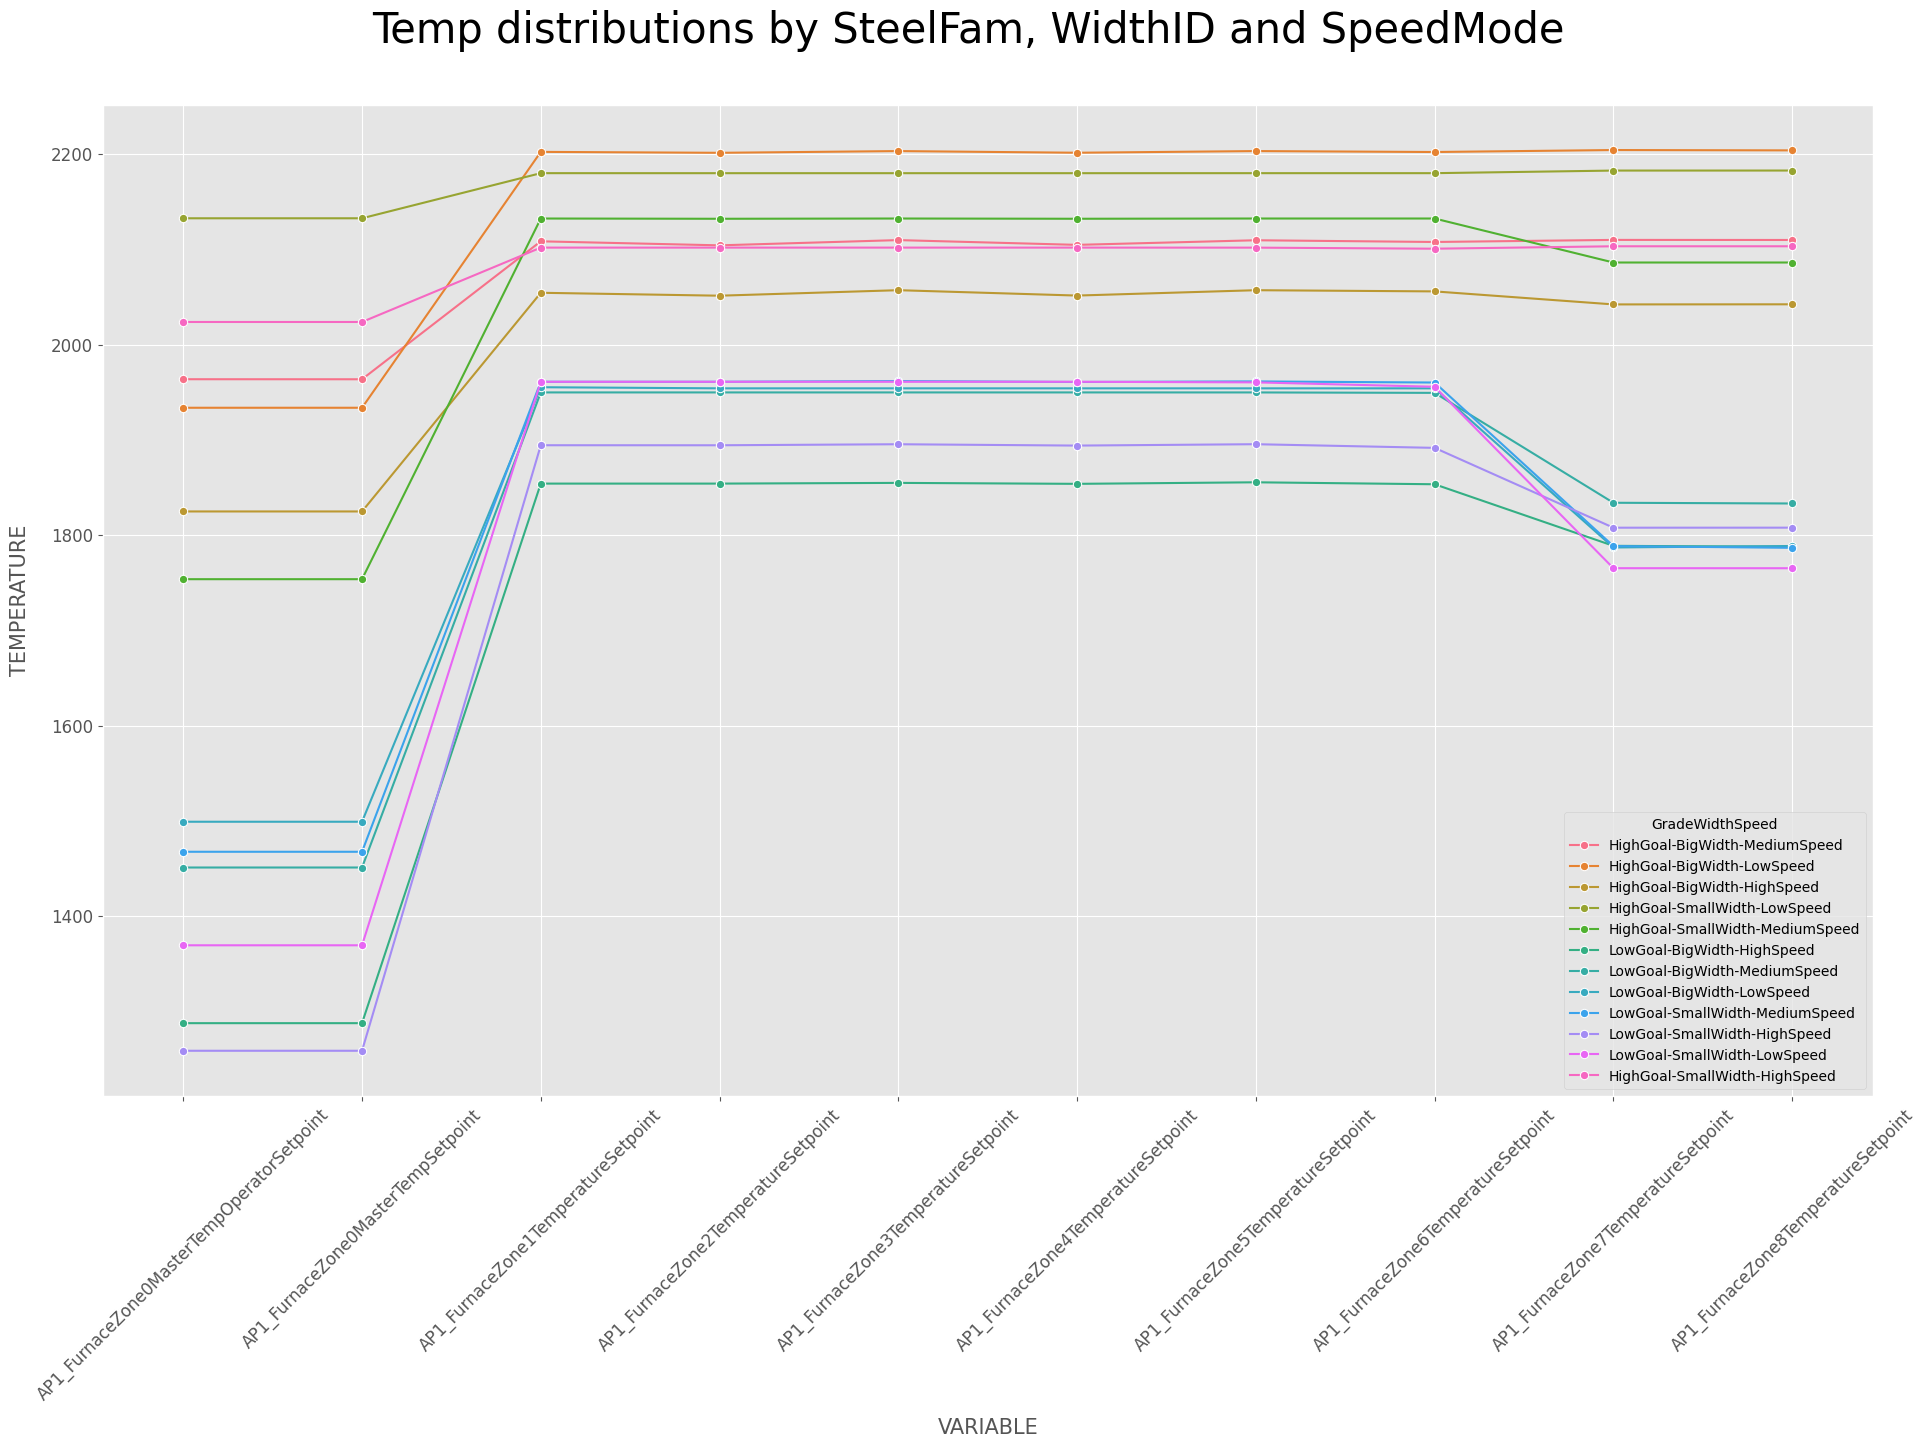

In [49]:
#SHOW TEM DISTRIBUTION AVERAGED BY STEELGRADEFAM (2 DISTRIBUTIONS): USE IT TO CREATE rampFdbk/soakFdbk VARIABLES
#TempFdbk=pd.melt(dfXY.loc[time:dfXY.index[i-1],dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk',regex=True)].reset_index(),id_vars=['ts'])
#dfXY[dfXY.columns[dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk|SteelFamCluster',regex=True)]].groupby("SteelFamCluster").std().reset_index()
fig,axes=plt.subplots(figsize=(20,15))
#sns.lineplot(data=pd.melt(dfXY[dfXY.columns[dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk|SteelFamCluster',regex=True)]].groupby("SteelFamCluster").mean().reset_index(),id_vars=['SteelFamCluster']),x='variable',y='value',hue='SteelFamCluster',lw=1,marker='o',errorbar='sd',markers=True,palette="dark:#5A9_r",ax=axes)#markers={'s':20,'marker':'o'}
dfRampSoak = dfSP_filtered[dfSP_filtered.columns[dfSP_filtered.columns.str.contains('.*Zone.*[Ss]et[Pp]oint.*|GradeWidthSpeed',regex=True)]]#.groupby("SteelFamCluster").mean().reset_index()
sns.lineplot(data=pd.melt(dfRampSoak,id_vars=['GradeWidthSpeed']),x='variable',y='value',hue='GradeWidthSpeed',estimator=np.mean,err_style="bars",errorbar=None,markers=True,lw=1.5,marker='o',palette="husl",ax=axes)#markers={'s':20,'marker':'o'},palette="dark:#5A9_r",errorbar='sd'
fig.suptitle('Temp distributions by SteelFam, WidthID and SpeedMode',fontsize=30)
axes.tick_params(axis='x', labelsize=12)
axes.tick_params(axis='y', labelsize=12)
axes.set_xlabel("VARIABLE",fontsize=15,labelpad=10)
axes.set_ylabel("TEMPERATURE",fontsize=15,labelpad=15)
plt.xticks(rotation=45)
fig.tight_layout(pad=3)
plt.savefig(r"C:\Users\carlo\Desktop\Projects\AP1\AP1_repo\MODELproject\ZoneTempSP_statistical\TempSP_statisticalMeanStd.png", bbox_inches="tight")

#Add variables to dfXY
# dfRampSoak = dfRampSoak.groupby("SteelFamCluster").mean().reset_index()
# dfRampSoak = dfXY[dfXY.columns[dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk|SteelFamCluster',regex=True)]].groupby("SteelFamCluster").mean()#.reset_index()
# dfRampSoak["rampFdbk"] = dfRampSoak.apply(lambda x: x["AP1_FurnaceZone1TopTemp"]-x["AP1_FurnaceZone0MasterTempFdbk"],axis=1)
# dfRampSoak["soakFdbk"] = dfRampSoak.iloc[:,1:-2].mean(axis=1)

# dfXY.loc[:,"rampFdbk"] = dfXY.loc[:,"SteelFamCluster"].cat.rename_categories({"HighGoal":1,"LowGoal":0}).astype(float)
# dfXY.loc[:,'rampFdbk']=dfXY[["rampFdbk"]].map(lambda y: dfRampSoak.loc["HighGoal","rampFdbk"] if y==1 else dfRampSoak.loc["LowGoal","rampFdbk"]) 

# dfXY.loc[:,"soakFdbk"] = dfXY.loc[:,"SteelFamCluster"].cat.rename_categories({"HighGoal":1,"LowGoal":0}).astype(float)
# dfXY.loc[:,'soakFdbk']=dfXY[["soakFdbk"]].map(lambda y: dfRampSoak.loc["HighGoal","soakFdbk"] if y==1 else dfRampSoak.loc["LowGoal","soakFdbk"])
# dfRampSoak

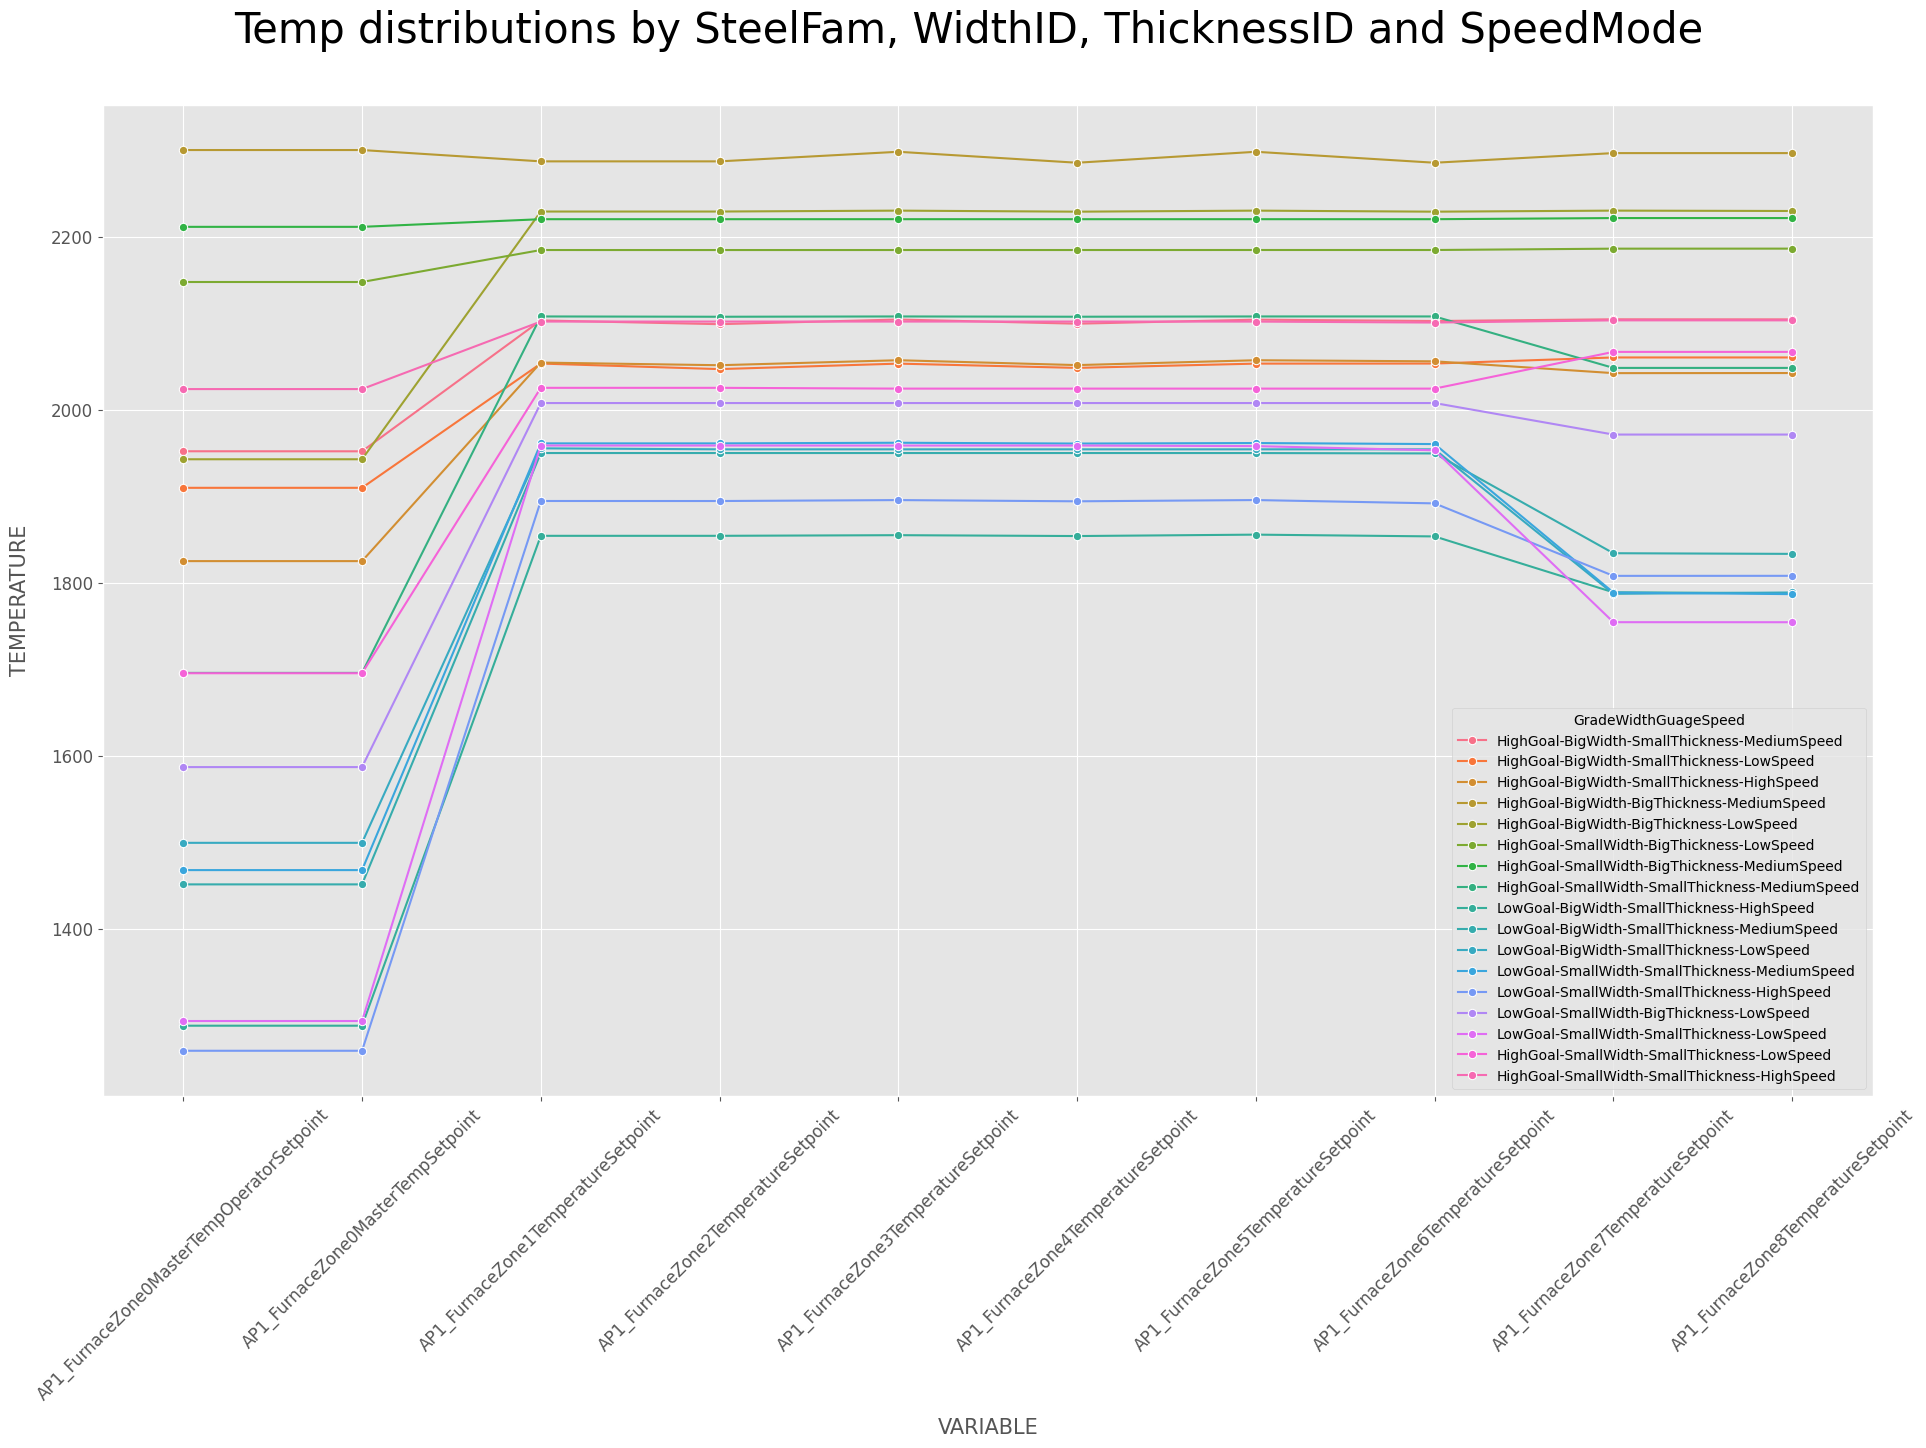

In [50]:
#SHOW TEM DISTRIBUTION AVERAGED BY STEELGRADEFAM (2 DISTRIBUTIONS): USE IT TO CREATE rampFdbk/soakFdbk VARIABLES
#TempFdbk=pd.melt(dfXY.loc[time:dfXY.index[i-1],dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk',regex=True)].reset_index(),id_vars=['ts'])
#dfXY[dfXY.columns[dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk|SteelFamCluster',regex=True)]].groupby("SteelFamCluster").std().reset_index()
fig,axes=plt.subplots(figsize=(20,15))
#sns.lineplot(data=pd.melt(dfXY[dfXY.columns[dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk|SteelFamCluster',regex=True)]].groupby("SteelFamCluster").mean().reset_index(),id_vars=['SteelFamCluster']),x='variable',y='value',hue='SteelFamCluster',lw=1,marker='o',errorbar='sd',markers=True,palette="dark:#5A9_r",ax=axes)#markers={'s':20,'marker':'o'}
dfRampSoak = dfSP_filtered[dfSP_filtered.columns[dfSP_filtered.columns.str.contains('.*Zone.*[Ss]et[Pp]oint.*|GradeWidthGuageSpeed',regex=True)]]#.groupby("SteelFamCluster").mean().reset_index()
sns.lineplot(data=pd.melt(dfRampSoak,id_vars=['GradeWidthGuageSpeed']),x='variable',y='value',hue='GradeWidthGuageSpeed',estimator=np.mean,err_style="bars",errorbar=None,markers=True,lw=1.5,marker='o',palette="husl",ax=axes)#markers={'s':20,'marker':'o'},palette="dark:#5A9_r",errorbar='sd'
fig.suptitle('Temp distributions by SteelFam, WidthID, ThicknessID and SpeedMode',fontsize=30)
axes.tick_params(axis='x', labelsize=12)
axes.tick_params(axis='y', labelsize=12)
axes.set_xlabel("VARIABLE",fontsize=15,labelpad=10)
axes.set_ylabel("TEMPERATURE",fontsize=15,labelpad=15)
plt.xticks(rotation=45)
fig.tight_layout(pad=3)
plt.savefig(r"C:\Users\carlo\Desktop\Projects\AP1\AP1_repo\MODELproject\ZoneTempSP_statistical\TempSP2_statisticalMeanStd.png", bbox_inches="tight")

#Add variables to dfXY
# dfRampSoak = dfRampSoak.groupby("SteelFamCluster").mean().reset_index()
# dfRampSoak = dfXY[dfXY.columns[dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk|SteelFamCluster',regex=True)]].groupby("SteelFamCluster").mean()#.reset_index()
# dfRampSoak["rampFdbk"] = dfRampSoak.apply(lambda x: x["AP1_FurnaceZone1TopTemp"]-x["AP1_FurnaceZone0MasterTempFdbk"],axis=1)
# dfRampSoak["soakFdbk"] = dfRampSoak.iloc[:,1:-2].mean(axis=1)

# dfXY.loc[:,"rampFdbk"] = dfXY.loc[:,"SteelFamCluster"].cat.rename_categories({"HighGoal":1,"LowGoal":0}).astype(float)
# dfXY.loc[:,'rampFdbk']=dfXY[["rampFdbk"]].map(lambda y: dfRampSoak.loc["HighGoal","rampFdbk"] if y==1 else dfRampSoak.loc["LowGoal","rampFdbk"]) 

# dfXY.loc[:,"soakFdbk"] = dfXY.loc[:,"SteelFamCluster"].cat.rename_categories({"HighGoal":1,"LowGoal":0}).astype(float)
# dfXY.loc[:,'soakFdbk']=dfXY[["soakFdbk"]].map(lambda y: dfRampSoak.loc["HighGoal","soakFdbk"] if y==1 else dfRampSoak.loc["LowGoal","soakFdbk"])
# dfRampSoak